In [2]:
import numpy as np

import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # setting seaborn default for plots
%matplotlib inline

In [3]:
#load data files
train_data=pd.read_csv('../input/widbot/training.csv',sep=';',index_col=None)
test_data=pd.read_csv('../input/widbot/validation.csv',sep=';',index_col=None)

In [4]:
train_data.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [5]:
test_data.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [6]:
len(train_data),len(test_data)

(3700, 200)

In [7]:
#doing Concatenate to full data for perprocessing takeplace on the both files
df=pd.concat([train_data,test_data])

In [8]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [9]:
len(df)

3900

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 199
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable1   3858 non-null   object 
 1   variable2   3858 non-null   object 
 2   variable3   3900 non-null   object 
 3   variable4   3834 non-null   object 
 4   variable5   3834 non-null   object 
 5   variable6   3831 non-null   object 
 6   variable7   3831 non-null   object 
 7   variable8   3900 non-null   object 
 8   variable9   3900 non-null   object 
 9   variable10  3900 non-null   object 
 10  variable11  3900 non-null   int64  
 11  variable12  3900 non-null   object 
 12  variable13  3900 non-null   object 
 13  variable14  3797 non-null   float64
 14  variable15  3900 non-null   int64  
 15  variable17  3797 non-null   float64
 16  variable18  1644 non-null   object 
 17  variable19  3900 non-null   int64  
 18  classLabel  3900 non-null   object 
dtypes: float64(2), int64(3), obj

In [11]:
#check if ther any non values
df.isnull().values.any()

True

In [12]:
#check the numbers for both class
df['classLabel'].value_counts()

yes.    3517
no.      383
Name: classLabel, dtype: int64

In [13]:
df.dtypes

variable1      object
variable2      object
variable3      object
variable4      object
variable5      object
variable6      object
variable7      object
variable8      object
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

In [14]:
#convert ',' to '.' to transform it as float number
df['variable2']=df['variable2'].str.replace(',', '.').astype(float)
df['variable3']=df['variable3'].str.replace(',', '.').astype(float)
df['variable8']=df['variable8'].str.replace(',', '.').astype(float)

In [15]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [16]:
#label encoding
df.replace({"no.": 0, "yes.": 1}, inplace=True)

In [17]:
#Dealing with null values and fill it by median values for string features
#df["variable4"].value_counts().idxmax()
Str_features = ['variable1','variable4', 'variable5', 'variable6','variable7','variable9','variable10','variable12','variable13','variable18']
for i in range(len(Str_features)):
    value=df[Str_features[i]].value_counts().idxmax()
    df[Str_features[i]]=df[Str_features[i]].fillna(value)

In [18]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,0
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,t,0,0
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,0
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,t,0,0
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,0


In [19]:
#check again if there any nan values exist
df.isnull().values.any()

True

In [20]:
#print columns that contain nan values to deal with it separately
df.isna().any()

variable1     False
variable2      True
variable3     False
variable4     False
variable5     False
variable6     False
variable7     False
variable8     False
variable9     False
variable10    False
variable11    False
variable12    False
variable13    False
variable14     True
variable15    False
variable17     True
variable18    False
variable19    False
classLabel    False
dtype: bool

In [21]:
#Dealing with null values and repalce it by mean values for numbres features
num_features = ['variable2','variable14', 'variable17']
for i in range(len(num_features)):
    df[num_features[i]]=df[num_features[i]].fillna(df[num_features[i]].mean())

In [22]:
#check again if there still any missing values
df.isnull().values.any()

False

In [23]:
#dealing with string features to be encoded 
features_to_encode=['variable1','variable4', 'variable5', 'variable6','variable7','variable9','variable10','variable12','variable13','variable18']
df_1=df[features_to_encode]

In [24]:
df_1.head()

,variable1,variable4,variable5,variable6,variable7,variable9,variable10,variable12,variable13,variable18
0,a,u,g,c,v,f,t,t,g,t
1,b,y,p,k,v,f,f,f,s,t
2,b,u,g,ff,ff,f,t,f,g,t
3,a,u,g,i,o,f,f,f,g,t
4,b,u,g,k,v,f,f,t,g,f


In [25]:
#apply hot encoding for those features
df_2 = pd.get_dummies(df_1,drop_first=True)

In [26]:
df_2.head()

,variable1_b,variable4_u,variable4_y,variable5_gg,variable5_p,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,...,variable7_n,variable7_o,variable7_v,variable7_z,variable9_t,variable10_t,variable12_t,variable13_p,variable13_s,variable18_t
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [27]:
df_2.dtypes

variable1_b     uint8
variable4_u     uint8
variable4_y     uint8
variable5_gg    uint8
variable5_p     uint8
variable6_aa    uint8
variable6_c     uint8
variable6_cc    uint8
variable6_d     uint8
variable6_e     uint8
variable6_ff    uint8
variable6_i     uint8
variable6_j     uint8
variable6_k     uint8
variable6_m     uint8
variable6_q     uint8
variable6_r     uint8
variable6_x     uint8
variable7_dd    uint8
variable7_ff    uint8
variable7_h     uint8
variable7_j     uint8
variable7_n     uint8
variable7_o     uint8
variable7_v     uint8
variable7_z     uint8
variable9_t     uint8
variable10_t    uint8
variable12_t    uint8
variable13_p    uint8
variable13_s    uint8
variable18_t    uint8
dtype: object

In [28]:
#drop all features that encoded form orignal df
df1=df.drop(features_to_encode, axis=1)

In [29]:
df1.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
0,17.92,0.000054,1.750,1,80.0,5,800000.0,0,0
1,16.92,0.000034,0.290,0,200.0,0,2000000.0,0,0
2,31.25,0.000112,0.000,1,96.0,19,960000.0,0,0
3,48.17,0.000133,0.335,0,0.0,120,0.0,0,0
4,32.33,0.000350,0.500,0,232.0,0,2320000.0,0,0


In [30]:
df=pd.concat([df_2,df1],axis=1)

In [31]:
df.head()

,variable1_b,variable4_u,variable4_y,variable5_gg,variable5_p,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,...,variable18_t,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
0,0,1,0,0,0,0,1,0,0,0,...,1,17.92,0.000054,1.750,1,80.0,5,800000.0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,1,16.92,0.000034,0.290,0,200.0,0,2000000.0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,1,31.25,0.000112,0.000,1,96.0,19,960000.0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,48.17,0.000133,0.335,0,0.0,120,0.0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,32.33,0.000350,0.500,0,232.0,0,2320000.0,0,0


In [32]:
#check data type for df
df.dtypes

variable1_b       uint8
variable4_u       uint8
variable4_y       uint8
variable5_gg      uint8
variable5_p       uint8
variable6_aa      uint8
variable6_c       uint8
variable6_cc      uint8
variable6_d       uint8
variable6_e       uint8
variable6_ff      uint8
variable6_i       uint8
variable6_j       uint8
variable6_k       uint8
variable6_m       uint8
variable6_q       uint8
variable6_r       uint8
variable6_x       uint8
variable7_dd      uint8
variable7_ff      uint8
variable7_h       uint8
variable7_j       uint8
variable7_n       uint8
variable7_o       uint8
variable7_v       uint8
variable7_z       uint8
variable9_t       uint8
variable10_t      uint8
variable12_t      uint8
variable13_p      uint8
variable13_s      uint8
variable18_t      uint8
variable2       float64
variable3       float64
variable8       float64
variable11        int64
variable14      float64
variable15        int64
variable17      float64
variable19        int64
classLabel        int64
dtype: object

**The problem here is Imbalanced Data set lead to biased to the majority class**

1    3517
0     383
Name: classLabel, dtype: int64

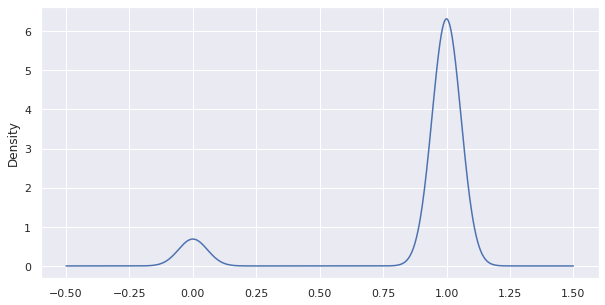

In [33]:
df['classLabel'].plot(kind="density", figsize=(10,5))
df['classLabel'].value_counts()

In [34]:
df_Data=df.drop(columns=['classLabel'])
df_Label=df['classLabel']

In [35]:
df_Label=pd.DataFrame(df_Label)

In [36]:
train_dataX=df_Data.iloc[0:len(train_data),:]
val_data=df_Data.iloc[len(train_data):,:]

In [37]:
y_train=df_Label.iloc[0:len(train_data),:]
y_val=df_Label.iloc[len(train_data):,:]

In [38]:
len(train_dataX),len(val_data),len(y_train),len(y_val)

(3700, 200, 3700, 200)

**Handle Imbalanced Dataset**

**Deal with imbalanced data by using Resampling Techniques**

- Oversampling Minority Class:  Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

In [39]:
#Dealing with imbalance problem first method 
from sklearn.utils import resample

In [40]:
X = pd.concat([train_dataX, y_train], axis=1)
X.head()

,variable1_b,variable4_u,variable4_y,variable5_gg,variable5_p,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,...,variable18_t,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
0,0,1,0,0,0,0,1,0,0,0,...,1,17.92,0.000054,1.750,1,80.0,5,800000.0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,1,16.92,0.000034,0.290,0,200.0,0,2000000.0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,1,31.25,0.000112,0.000,1,96.0,19,960000.0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,48.17,0.000133,0.335,0,0.0,120,0.0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,32.33,0.000350,0.500,0,232.0,0,2320000.0,0,0


In [41]:
X['classLabel'].value_counts()

1    3424
0     276
Name: classLabel, dtype: int64

In [42]:
# separate minority and majority classes
no_classLabel= X[X.classLabel==0]
yes_classLabel = X[X.classLabel==1]

# upsample minority
no_classLabel_upsampled = resample(no_classLabel,
                          replace=True, # sample with replacement
                          n_samples=len(yes_classLabel), # match number in majority class
                          random_state=27) # reproducible results


In [43]:
upsampled = pd.concat([yes_classLabel, no_classLabel_upsampled])

# check new class counts
upsampled.classLabel.value_counts()

1    3424
0    3424
Name: classLabel, dtype: int64

1    3424
0    3424
Name: classLabel, dtype: int64

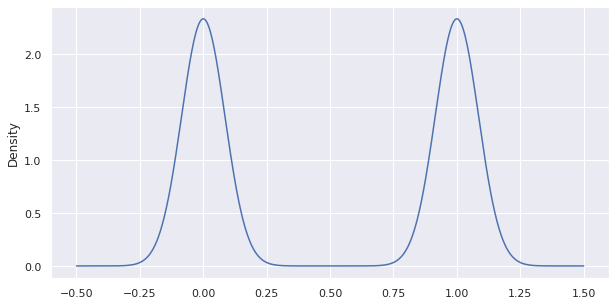

In [44]:
upsampled['classLabel'].plot(kind="density", figsize=(10,5))
upsampled['classLabel'].value_counts()

In [45]:
upsampled.head()

,variable1_b,variable4_u,variable4_y,variable5_gg,variable5_p,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,...,variable18_t,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
39,0,1,0,0,0,0,0,0,0,0,...,1,47.25,0.000075,2.750,1,333.0,892,3330000.0,1,1
40,0,1,0,0,0,0,0,1,0,0,...,1,33.67,0.000037,0.375,0,300.0,44,3000000.0,1,1
41,1,1,0,0,0,0,0,1,0,0,...,1,45.00,0.000850,14.000,1,88.0,2000,880000.0,1,1
42,1,1,0,0,0,0,0,0,0,0,...,1,33.17,0.000104,6.500,0,164.0,31285,1640000.0,1,1
43,0,1,0,0,0,0,0,0,0,0,...,0,25.00,0.000087,1.040,0,160.0,5860,1600000.0,1,1


In [46]:
#shuffle data
upsampled = upsampled.sample(frac=1).reset_index(drop=True)

In [47]:
upsampled.head()

,variable1_b,variable4_u,variable4_y,variable5_gg,variable5_p,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,...,variable18_t,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,classLabel
0,1,1,0,0,0,0,0,0,0,0,...,1,26.00,0.000100,1.750,0,280.0,0,2800000.0,1,1
1,0,1,0,0,0,0,0,1,0,0,...,1,46.67,0.000046,0.415,11,440.0,6,4400000.0,1,1
2,1,1,0,0,0,0,0,0,0,0,...,1,40.58,0.000150,0.000,0,300.0,0,3000000.0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,18.25,0.001000,1.000,1,120.0,1,1200000.0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,1,53.92,0.000963,8.665,5,0.0,0,0.0,1,1


In [48]:
y_train = upsampled.classLabel
X_train = upsampled.drop('classLabel', axis=1)

In [49]:
#make sure of features and label dim
len(X_train),len(y_train)

(6848, 6848)

**Data Normalization**

In [50]:
# from sklearn.preprocessing import MinMaxScaler
# sc_X = MinMaxScaler()
# train_dataX_normalized = sc_X.fit_transform(X_train)
# val_data_normalized = sc_X.transform(val_data)

**Apply Algorithms for Training**

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import sklearn.ensemble as ens

**1.SVM**

In [52]:
svm_clf = SVC(probability=True,kernel='rbf')
svm_clf.fit(X_train,y_train)

SVC(probability=True)

In [53]:
y_pred_svm=svm_clf.predict(val_data)

In [54]:
confusion_matrix(y_val, y_pred_svm)   


array([[70, 37],
       [29, 64]])

In [55]:
accuracy_score(y_val, y_pred_svm)


0.67

In [56]:
f1_score(y_val, y_pred_svm, average='macro')


0.6697027324592133

In [57]:
from sklearn import metrics
def buildROC(y_val, y_pred_svm):
    fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred_svm)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

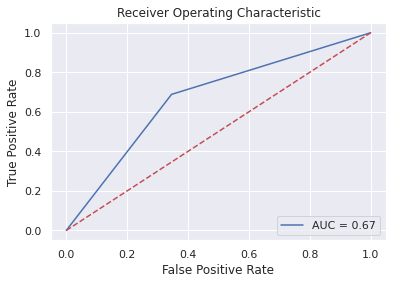

In [58]:
buildROC(y_val, y_pred_svm)


**hyperprameter tuning for SVM**

In [59]:
svm_clf = SVC(probability=True)
svm_parm = {'kernel': ['rbf'], 
            'C': [1, 5, 50], 
            'degree': [3, 5, 7,10], 
       'gamma':[0.04,.1,0.2,.3,.4,.6],
           'random_state': [0,1,2,3,4]}

In [60]:
clfs = [svm_clf]
params = [svm_parm ] 
clf_names = [ 'SVM']

In [61]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(X_train,y_train)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

In [62]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'random_state': 3, 'kernel': 'rbf', 'gamma': 0.4, 'degree': 3, 'C': 50}

In [63]:
max(clfs_best_scores)


1.0

In [75]:
svm_clf_ = SVC(random_state= 3, kernel= 'rbf', gamma= 0.5, degree= 3, C= 50)
svm_clf_.fit(X_train,y_train)
y_pred_svm_=svm_clf_.predict(val_data)

In [77]:
accuracy_score(y_val, y_pred_svm_)


0.53

**2.DecisionTreeClassifier**

In [67]:
Dec_clfb = DecisionTreeClassifier(criterion='entropy')
Dec_clfb.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [68]:
y_preDec=Dec_clfb.predict(val_data)

In [69]:
accuracy_score(y_val, y_preDec)

0.495

In [70]:
confusion_matrix(y_val, y_preDec)

array([[53, 54],
       [47, 46]])

In [71]:
print(classification_report(y_val, y_preDec))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       107
           1       0.46      0.49      0.48        93

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.50       200



**3.GradientBoostingClassifier hyperprameter**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 1.0049696 ,  2.37651095,  5.09209065,  7.4869761 , 10.05625563,
         12.0290854 , 14.18558807, 16.84775553,  1.00465884,  2.71244807,
          5.22306533,  7.72069578,  9.98966584, 11.8749402 , 15.16785173,
         16.60321865,  0.96549253,  2.62687292,  4.86380229,  7.54233894,
         10.34955177, 12.58822117, 14.80875511, 17.53629293,  0.95714746,
          2.85895629,  5.09717908,  7.49828024,  9.93505983, 12.7253499 ,
         15.41218529, 17.36801443,  0.97877584,  2.55456243,  5.02665153,
          7.54754019, 10.55969706, 13.00536523, 14.84991412, 17.9732348 ,
          1.15565763,  2.51929159,  5.18730803,  7.70100684, 10.31711049,
         12.66897683, 15.93150263, 15.49162316]),
  'std_fit_time': array([0.19075661, 0.29196953, 0.22937812, 0.37040352, 0.45816175,
         0.1908989 , 0.22589086, 0.51958786, 0.06761552, 0.27510527,
         0.35679472, 0.15870261, 0.18433003, 0.11367514, 0.6243292 ,
         0.29477064, 0.04372937, 0.06961363,

In [75]:
GB=GradientBoostingClassifier(learning_rate=0.15, n_estimators= 100)

In [76]:
GB.fit(X=X_train,y=y_train)

GradientBoostingClassifier(learning_rate=0.15)

In [77]:
pred_GB= GB.predict(val_data)

In [78]:
accuracy_score(y_val, pred_GB)


0.495

**4.LogisticRegression_hyperprameter tuning**

In [84]:
logi_clf = LogisticRegression(solver='lbfgs', max_iter=500)
logi_parm = {"C": [0.1, 0.5, 1, 5, 10, 50],
            'random_state': [0,1,2,3,4,5]}

In [85]:
clfs = [logi_clf]
params = [logi_parm] 
clf_names = ['logistic']

In [86]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(X_train,y_train)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

In [87]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'random_state': 5, 'C': 1}

In [88]:
max(clfs_best_scores)


0.6483646755850346

**4.BayesianCalssifier**

In [89]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,y_train)
pred_nb= gnb_clf.predict(val_data)
accuracy_score(y_val, pred_nb)

0.61

**5.KNN_hyperprameter tuning**

In [90]:


knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 
            'weights':['uniform', 'distance'], 
            'p': [1,2]}

clfs = [knn_clf]
params = [ knn_parm] 
clf_names = ['KNN']

In [91]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in zip(clfs, params):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(X_train,y_train)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

**print the best accuracy**

In [92]:
max(clfs_best_scores)


1.0

**print the best model prameter**

In [93]:
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'weights': 'distance', 'p': 2, 'n_neighbors': 10}

In [96]:
knn_clf = KNeighborsClassifier(weights ='distance', p= 2, n_neighbors=10)
knn_clf.fit(X_train,y_train)
pred_knn= gnb_clf.predict(val_data)
accuracy_score(y_val, pred_knn)

0.61

**So the best resut obtained from the first model SVM by accurcy 67 percent and f1_score=66 percent**